/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_97272/2104176449.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval = interval, period = PERIOD)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Average_Price,Money_Flow,Pos_Flow,Neg_Flow,MFR,...,BB_SMA,BB_STD,Upper Band,Lower Band,MFI_Strategy,BB_Strategy,Confl_strategy,Strategy,asset_cum_returns,strategy_cum_returns
32,389.904999,390.130005,388.809998,388.934998,5998109,389.615000,2.336953e+09,389.615000,0.000000,1.335596,...,388.166701,3.322273,391.488973,384.844428,NaN,NaN,NaN,0,NaN,NaN
33,389.500000,390.220001,388.760010,389.910004,6514861,389.493337,2.537495e+09,0.000000,389.493337,1.002218,...,388.672701,2.607311,391.280012,386.065389,0.0,0.0,0.0,0,-0.001039,0.000000
34,390.609985,390.649994,389.290009,389.500000,9940925,390.183329,3.878783e+09,390.183329,0.000000,1.335647,...,389.056700,2.259350,391.316051,386.797350,0.0,0.0,0.0,0,0.001808,0.000000
35,393.040009,393.159393,391.799988,392.230011,11151146,392.666463,4.378681e+09,392.666463,0.000000,1.336370,...,389.441701,2.248707,391.690408,387.192994,0.0,0.0,0.0,0,0.008040,0.000000
36,392.609985,393.059998,391.380005,393.049988,8097620,392.349996,3.177101e+09,0.000000,392.349996,1.000355,...,389.793645,2.160119,391.953764,387.633525,0.0,-1.0,-1.0,0,0.006938,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,675.049988,675.640015,672.760010,674.400024,8106653,674.483337,5.467802e+09,674.483337,0.000000,0.556536,...,678.484995,4.956849,683.441844,673.528145,1.0,0.0,1.0,0,0.731319,0.400059
5012,673.130005,675.659973,672.140015,675.054993,9745100,673.643331,6.564722e+09,0.000000,673.643331,0.399941,...,677.984995,4.967985,682.952979,673.017010,1.0,0.0,1.0,0,0.726395,0.400059
5013,674.019897,674.440002,671.489990,673.109985,9663134,673.316630,6.506349e+09,0.000000,673.316630,0.400522,...,677.540988,4.901977,682.442965,672.639011,1.0,0.0,1.0,0,0.728677,0.400059
5014,672.645020,675.119995,672.210022,674.020020,9331407,673.325012,6.283070e+09,673.325012,0.000000,0.556650,...,677.029739,4.849866,681.879606,672.179873,1.0,0.0,1.0,0,0.725151,0.400059


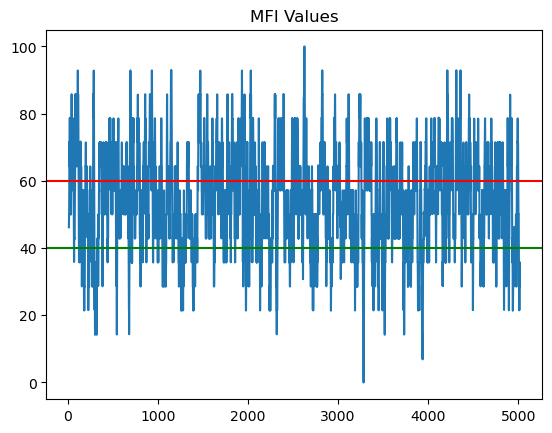

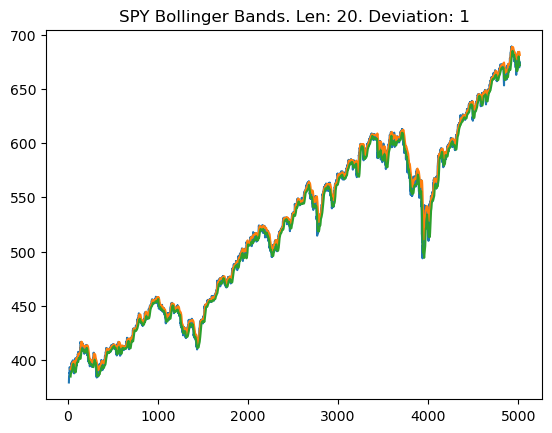

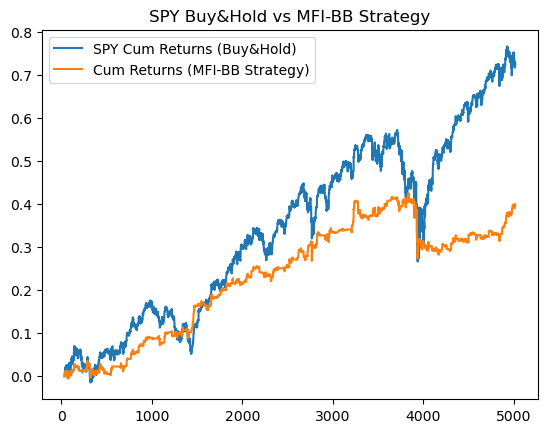

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Step 1: Ticker
TICKER = "SPY"

# Step 2: Price Behavior 
INTERVAL = "1h"
if INTERVAL == "1h":
    PERIOD = "720d"
else:
    PERIOD = "max"

# Step 3: MFI
MFI_LENGTH = 14
MFI_OVERBROUGHT = 60
MFI_OVERSOLD = 40

# Step 4: BB
BB_LENGTH = 20
STD_DEV = 1

# Step 5: Data Subsection
LOOKBACK = 10000

def get_data(ticker = TICKER, interval = INTERVAL, lookback = LOOKBACK):

    # Step 1: Download Data
    df = yf.download(ticker, interval = interval, period = PERIOD)

    # Step 2: Select only Level 0 of Multilevel Columns
    df.columns = df.columns.get_level_values(0)

    # Step 3: Simplifying df for Plots
    df = df.reset_index(drop=True)

    return df.iloc[-lookback:, :]
        # -lookback: all loockback rows
        # : all columns 

def add_MFI(df, length = MFI_LENGTH, overbrought = MFI_OVERBROUGHT, oversold = MFI_OVERSOLD):
    
    # Step 1: Build the MFI Index 
    df["Average_Price"] = (df["High"]+df["Low"]+df["Close"])/3
    df["Money_Flow"] = df["Volume"]*df["Average_Price"]
    df["Pos_Flow"] = np.where(df["Average_Price"].diff()>0, df["Average_Price"], 0)
    df["Neg_Flow"] = np.where(df["Average_Price"].diff()<0, df["Average_Price"], 0)
    df["MFR"] = df["Pos_Flow"].rolling(window = length).sum() / df["Neg_Flow"].rolling(window = length).sum()
    df["MFI"] = (100 - 100 / (1 + df["MFR"]))

    # Step 2: Plot the MFI Index
    plt.figure()
    plt.plot(df["MFI"])
    plt.title("MFI Values")

    # Step 3: Draw Overbrought & Oversold Lines
    plt.axhline(overbrought, color = "red")
    plt.axhline(oversold, color="green")

    # Step 4: Return Values withtout NA
    return df.dropna()

def add_BB(df, std_dev = STD_DEV, length = BB_LENGTH):

    # Step 1: Middle Bend Column
    df["BB_SMA"] = df["Close"].rolling(window=length).mean()
        # rolling(window=length): it takes the Close price and creates a moving window of length periods
        # mean(): it calculates the average price within that window at each step

    # Step 2: Std Deviation Column
    df["BB_STD"] = df["Close"].rolling(window=length).std()
        # std. dev/volatility: quantifies how spread out/ inconsistent your data is. 
        # It measures the average distance of each data point from the mean of the entire set

    # Step 3: Upper Band
    df["Upper Band"] = df["BB_SMA"] + (std_dev * df["BB_STD"])
        # It takes the middle band's value and adds the volatility * std_dev factor (typically 2) 
        # This places the upper line 2 std_dev above the middle band.

    # Step 4: Lower Band
    df["Lower Band"] = df["BB_SMA"] - (std_dev * df["BB_STD"])

    # Step 5: Plot the BB
    plt.figure()
    plt.plot(df["Close"]) # Blue
    plt.plot(df["Upper Band"]) # Orange
    plt.plot(df["Lower Band"]) # Green
    plt.title(f"{TICKER} Bollinger Bands. Len: {BB_LENGTH}. Deviation: {STD_DEV}")

    return df.dropna()
    # Drop na, since it takes us 20 days to get the first rollings average values 

def add_BB_strategy(df):

    # Step 1: Short when Close > Upper Band, Long when Close < Lower Band, Wait when none apply 
    df["BB_Strategy"] = np.where(df["Close"] > df["Upper Band"], -1,
                        np.where(df["Close"] < df["Lower Band"], 1, 0))
    
    # Step 2: Prevent Lookahead Bias (Only use available information)
    df["BB_Strategy"] = df["BB_Strategy"].shift(1)

    return df

def add_MFI_strategy(df, overbrought = MFI_OVERBROUGHT, oversold = MFI_OVERSOLD):
    
    # Step 1: Short when MFI > overbrought, Long when MFI < oversold
    df["MFI_Strategy"] = np.where(df["MFI"] > overbrought, -1,
                        np.where(df["MFI"] < oversold, 1, 0))
    
    # Step 2: Prevent lookahed bias (only use information that is available)
    df["MFI_Strategy"] = df["MFI_Strategy"].shift(1)

    return df

def add_confluence_strategy(df):

    # Step 1: Sum both Strategies
    df["Confl_strategy"] = df["MFI_Strategy"] + df["BB_Strategy"]

    # Step 1: Only keep 2,-2,0 (strategies align) and turn them into 1,-1,0
    df["Strategy"] = np.where(df["Confl_strategy"] == 2, 1,
                    np.where(df["Confl_strategy"] == -2, 1, 0))
    
    return df

def test_strategy(df):

    # Step 1: Buy&Hold Compound Returns - What is my total profit if I bought on day one and just held it?
    df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1
        # pct.change(): get the tiny percentage return per day
        # cumprod(): multiply all of those returns together (compounding)
        # 1+ ... -1: turn daily returns like 2% in 1.02 and then back to eg 30% again

    # Step 2: Total Profits only if I followed my strategy's signals
    df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() -1
        # *df["Strategy": 
            # (1) you get the normal daily return, 
            # (-1) you get the opposite of the daily return. Only if the market goes down, you win
            # (0) you wait and get 0 return 

    # Step 3: Plot Returns
    plt.figure()
    plt.plot(df["asset_cum_returns"])
    plt.plot(df["strategy_cum_returns"])
    plt.legend([f"{TICKER} Cum Returns (Buy&Hold)", "Cum Returns (MFI-BB Strategy)"])
    plt.title(f"{TICKER} Buy&Hold vs MFI-BB Strategy")

    return df

def main():
    df = get_data()
    df = add_MFI(df)
    df = add_BB(df)
    df = add_MFI_strategy(df)
    df = add_BB_strategy(df)
    df = add_confluence_strategy(df)
    df = test_strategy(df)

    return df

df = main()
df


In [8]:
df["Strategy"].value_counts()

Strategy
0    3326
1    1658
Name: count, dtype: int64